<a href="https://colab.research.google.com/github/anil50prasad/hello-world/blob/master/LogisticRegression1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Logistic Regression with Python in Machine Learning
Logistic regression is a classification algorithm used to assign observations to a discrete set of classes. Some of the examples of classification problems are Email spam or not spam, Online transactions Fraud or not Fraud, Tumor Malignant or Benign. Logistic regression transforms its output using the logistic sigmoid function to return a probability value.

Logistic Regression
Logistic Regression is a Machine Learning algorithm which is used for the classification problems, it is a predictive analysis algorithm and based on the concept of probability.

image.png

We can call a Logistic Regression a Linear Regression model but the Logistic Regression uses a more complex cost function, this cost function can be defined as the ‘Sigmoid function’ or also known as the ‘logistic function’ instead of a linear function

The hypothesis of logistic regression tends it to limit the cost function between 0 and 1. Therefore linear functions fail to represent it as it can have a value greater than 1 or less than 0 which is not possible as per the hypothesis of logistic regression.

What is the Sigmoid Function?
image.png

In order to map predicted values to probabilities, we use the Sigmoid function. The function maps any real value into another value between 0 and 1. In machine learning, we use sigmoid to map predictions to probabilities.

Decision Boundary
We expect our classifier to give us a set of outputs or classes based on probability when we pass the inputs through a prediction function and returns a probability score between 0 and 1.

The RMS Titanic was a British passenger liner that sank in the North Atlantic Ocean in the early morning hours of 15 April 1912, after it collided with an iceberg during its maiden voyage from Southampton to New York City. There were an estimated 2,224 passengers and crew aboard the ship, and more than 1,500 died.

In [0]:

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
from sklearn.linear_model import LogisticRegression

In [0]:
titanic = sns.load_dataset('titanic')

In [4]:
titanic.head(10)


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


In [5]:
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

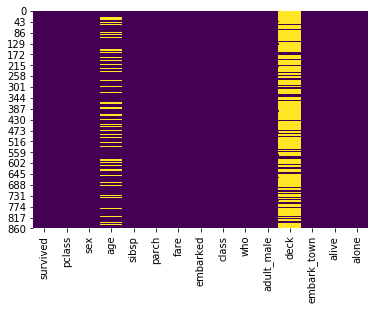

In [7]:

sns.heatmap(titanic.isnull(), cbar = False, cmap = 'viridis')

In [8]:
titanic['age'].isnull().sum()/titanic.shape[0]*100

19.865319865319865

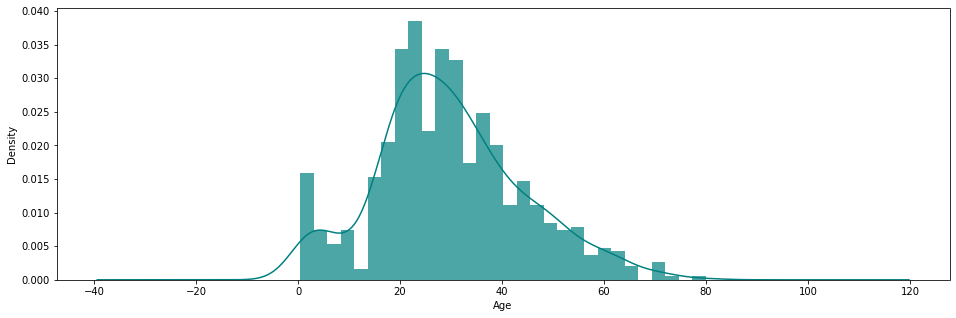

In [9]:

ax = titanic['age'].hist(bins = 30, density = True, stacked = True, color = 'teal', alpha = 0.7, figsize = (16, 5))
titanic['age'].plot(kind = 'density', color = 'teal')
ax.set_xlabel('Age')
plt.show()

Text(0.5, 1.0, 'Male')

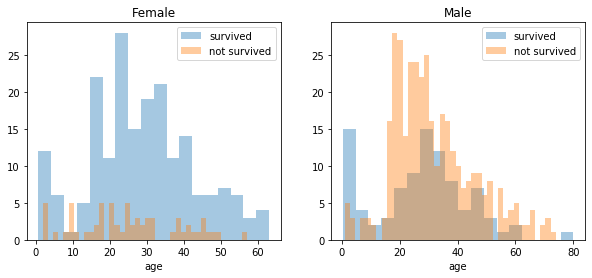

In [10]:
survived = 'survived'
not_survived = 'not survived'

fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (10, 4))
women = titanic[titanic['sex'] == 'female']
men = titanic[titanic['sex'] == 'male']


ax = sns.distplot(women[women[survived]==1].age.dropna(), bins = 18, label = survived, ax = axes[0], kde = False)
ax = sns.distplot(women[women[survived]==0].age.dropna(), bins = 40, label = not_survived, ax = axes[0], kde = False)
ax.legend()
ax.set_title('Female')


ax = sns.distplot(men[men[survived]==1].age.dropna(), bins = 18, label = survived, ax = axes[1], kde = False)
ax = sns.distplot(men[men[survived]==0].age.dropna(), bins = 40, label = not_survived, ax = axes[1], kde = False)
ax.legend()
ax.set_title('Male')

In [11]:
titanic['sex'].value_counts()

male      577
female    314
Name: sex, dtype: int64

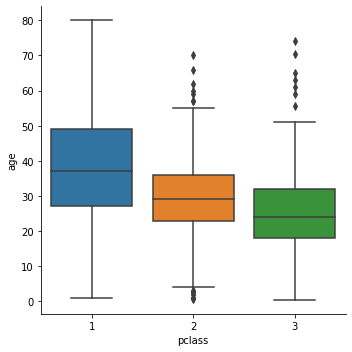

In [12]:
sns.catplot(x = 'pclass', y = 'age', data = titanic, kind = 'box')

In [0]:
sns.catplot(x = 'pclass', y = 'fare', data = titanic, kind = 'box')

In [13]:
titanic[titanic['pclass'] == 1]['age'].mean()

38.233440860215055

In [0]:

titanic[titanic['pclass'] == 2]['age'].mean()

In [0]:
titanic[titanic['pclass'] == 3]['age'].mean()

In [0]:

def impute_age(cols):
    age = cols[0]
    pclass = cols[1]
    
    if pd.isnull(age):
        if pclass == 1:
            return titanic[titanic['pclass'] == 1]['age'].mean()
        elif pclass == 2:
            return titanic[titanic['pclass'] == 2]['age'].mean()
        elif pclass == 3:
            return titanic[titanic['pclass'] == 3]['age'].mean()
        
    else:
        return age

In [0]:

titanic['age'] = titanic[['age', 'pclass']].apply(impute_age, axis = 1)

In [0]:
sns.heatmap(titanic.isnull(), cbar = False, cmap = 'viridis')


Analysing Embarked¶

In [0]:

f = sns.FacetGrid(titanic, row = 'embarked', height = 2.5, aspect= 3)
f.map(sns.pointplot, 'pclass', 'survived', 'sex', order = None, hue_order = None)
f.add_legend()

In [0]:

titanic['embarked'].isnull().sum()

In [0]:
titanic['embark_town'].value_counts()

In [0]:
common_value = 'S'
titanic['embarked'].fillna(common_value, inplace = True)

In [0]:
titanic['embarked'].isnull().sum()

In [0]:

sns.heatmap(titanic.isnull(), cbar = False, cmap = 'viridis')

In [0]:
titanic.drop(labels=['deck', 'embark_town', 'alive'], inplace = True, axis = 1)

In [0]:
sns.heatmap(titanic.isnull(), cbar = False, cmap = 'viridis')


In [0]:
titanic.info()

In [0]:
titanic.head()

In [0]:
titanic['fare'] = titanic['fare'].astype('int')
titanic['age'] = titanic['age'].astype('int')
titanic['pclass'] = titanic['pclass'].astype('int')

titanic.info()

# convert categorical data into numerical data

In [0]:

genders = {'male': 0, 'female': 1}
titanic['sex'] = titanic['sex'].map(genders)

In [0]:
who = {'man': 0, 'women': 1, 'child': 2}
titanic['who'] = titanic['who'].map(who)

In [0]:
adult_male = {True: 1, False: 0}
titanic['adult_male'] = titanic['adult_male'].map(adult_male)

In [0]:
alone = {True: 1, False: 0}
titanic['alone'] = titanic['alone'].map(alone)

In [0]:
ports = {'S': 0, 'C': 1, 'Q': 2}
titanic['embarked'] = titanic['embarked'].map(ports)

In [0]:
titanic.head()

In [0]:
titanic.drop(labels = ['class', 'who'], axis = 1, inplace= True)

In [0]:
titanic.head()

# Build Logistic Regression Model

In [0]:

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [0]:

X = titanic.drop('survived', axis = 1)
y = titanic['survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [0]:
X_train.shape

In [0]:

model = LogisticRegression(solver= 'lbfgs', max_iter = 400)
model.fit(X_train, y_train)
y_predict = model.predict(X_test)

In [0]:
model.score(X_test, y_test)